In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy.stats import norm, binom, geom
from scipy.stats import t,f
from scipy.stats import ttest_1samp, ttest_rel, ttest_ind
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind, f_oneway, kruskal
from scipy.stats import pearsonr, spearmanr
from scipy.stats import poisson, expon
from scipy.stats import levene, shapiro, ks_2samp, kstest
from statsmodels.graphics.gofplots import qqplot
import warnings
warnings.filterwarnings('ignore')

Dataset Link: https://www.kaggle.com/datasets/saurabhshahane/road-traffic-accidents/data?select=cleaned.csv

Content:
The data set has been prepared from manual records of road traffic accident of the year 2017-20. All the sensitive information have been excluded during data encoding and finally it has 32 features and 12316 instances of the accident. Then it is preprocessed and for identification of major causes of the accident by analyzing it using different machine learning classification algorithms algorithms. RTA Dataset.csv is the dataset before preprocessing and cleaned.csv is the preprocessed dataset.

In [2]:
df1=pd.read_csv('accidentdata.csv')
df=df1.copy()

#### B. Data Exploration

#### 1. Shape of data

In [3]:
df.shape

(12316, 15)

* There are 12316 rows and 15 columns

#### 2. First-5 Rows

In [4]:
df.head()

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,1
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2


#### 3. Name of Columns

In [5]:
df.columns

Index(['Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Lanes_or_Medians',
       'Types_of_Junction', 'Road_surface_type', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')

#### 4. Check if any Null/Missing Values in dataset ?

In [6]:
np.any(df.isna())

False

* No missing values in dataset

#### 5. Check if any duplicate rows present in dataset ?

In [7]:
np.any(df.duplicated())

True

* Duplicate data my be present as it does not have any specific id which may be considered as unique.

#### 6. Dataset Information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age_band_of_driver       12316 non-null  object
 1   Sex_of_driver            12316 non-null  object
 2   Educational_level        12316 non-null  object
 3   Vehicle_driver_relation  12316 non-null  object
 4   Driving_experience       12316 non-null  object
 5   Lanes_or_Medians         12316 non-null  object
 6   Types_of_Junction        12316 non-null  object
 7   Road_surface_type        12316 non-null  object
 8   Light_conditions         12316 non-null  object
 9   Weather_conditions       12316 non-null  object
 10  Type_of_collision        12316 non-null  object
 11  Vehicle_movement         12316 non-null  object
 12  Pedestrian_movement      12316 non-null  object
 13  Cause_of_accident        12316 non-null  object
 14  Accident_severity        12316 non-nul

#### 7. Number of unique values in each columns

In [9]:
df.nunique()

Age_band_of_driver          5
Sex_of_driver               3
Educational_level           7
Vehicle_driver_relation     4
Driving_experience          8
Lanes_or_Medians            7
Types_of_Junction           8
Road_surface_type           6
Light_conditions            4
Weather_conditions          9
Type_of_collision          10
Vehicle_movement           13
Pedestrian_movement         9
Cause_of_accident          20
Accident_severity           3
dtype: int64

#### 8. Exploring object variables

In [10]:
df.describe(include='object')

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident
count,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316
unique,5,3,7,4,8,7,8,6,4,9,10,13,9,20
top,18-30,Male,Junior high school,Employee,5-10yr,Two-way (divided with broken lines road marking),Y Shape,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,No distancing
freq,4271,11437,7619,9627,3363,4411,4543,11296,8798,10063,8774,8158,11390,2263


### C Univariate Analysis

#### 1. Road User Attributes
* ['Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Driving_experience']

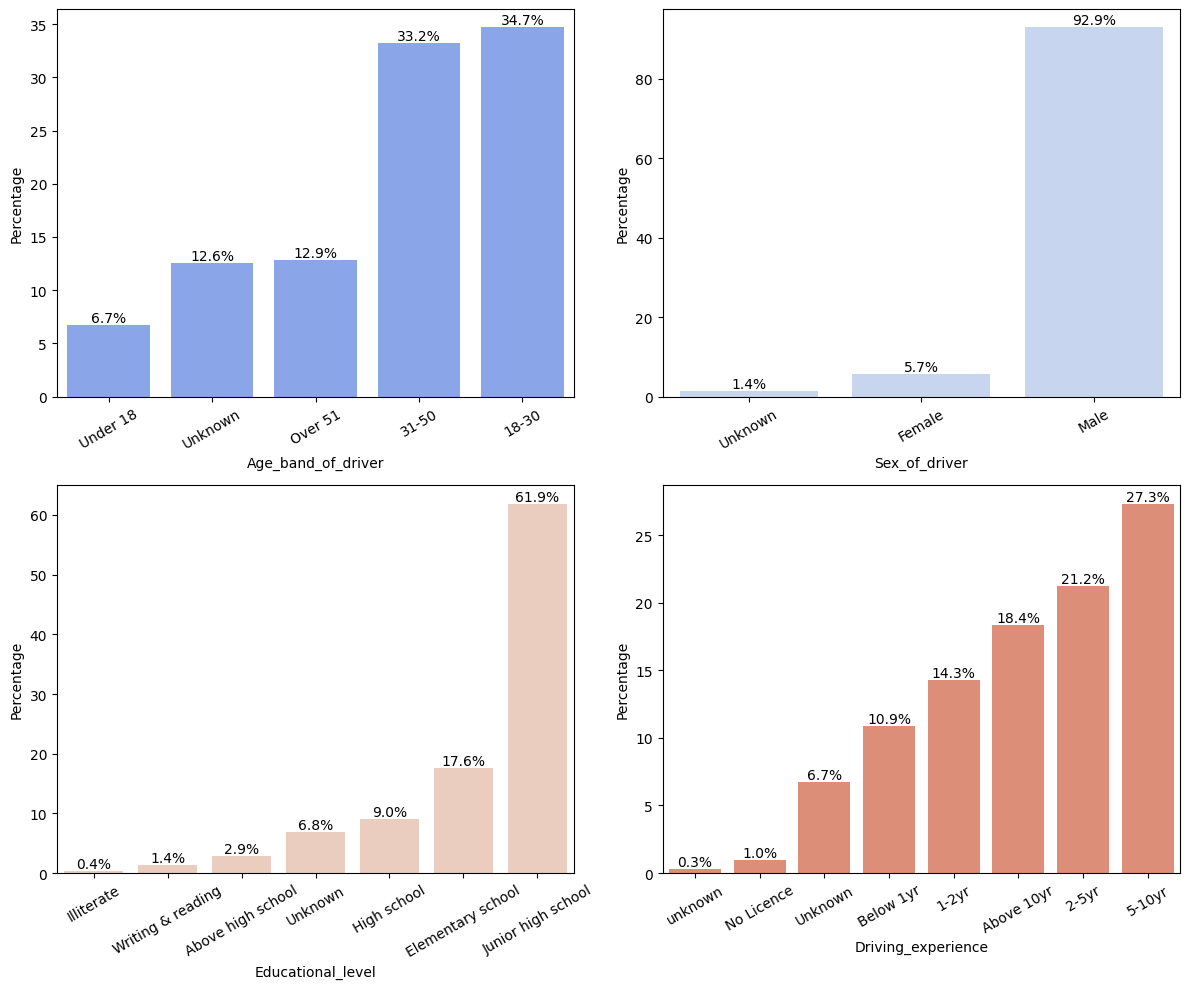

In [11]:
categories = ['Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Driving_experience']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
palette = sns.color_palette("coolwarm", len(categories))

for category, ax, color in zip(categories, axes.flatten(), palette):
    category_percentage = np.round(df[category].value_counts(normalize=True, ascending=True) * 100, 2)
    category_percentage_df = category_percentage.reset_index()
    category_percentage_df.columns = [category, 'Percentage']
    
    sns.barplot(data=category_percentage_df, x=category, y='Percentage', ax=ax, color=color)
    ax.bar_label(ax.containers[0], fmt='%.1f%%')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30) 

plt.tight_layout()
plt.show()

#### 2. Road & Environment Attrubutes
* ['Lanes_or_Medians','Types_of_Junction', 'Road_surface_type', 'Light_conditions','Weather_conditions']

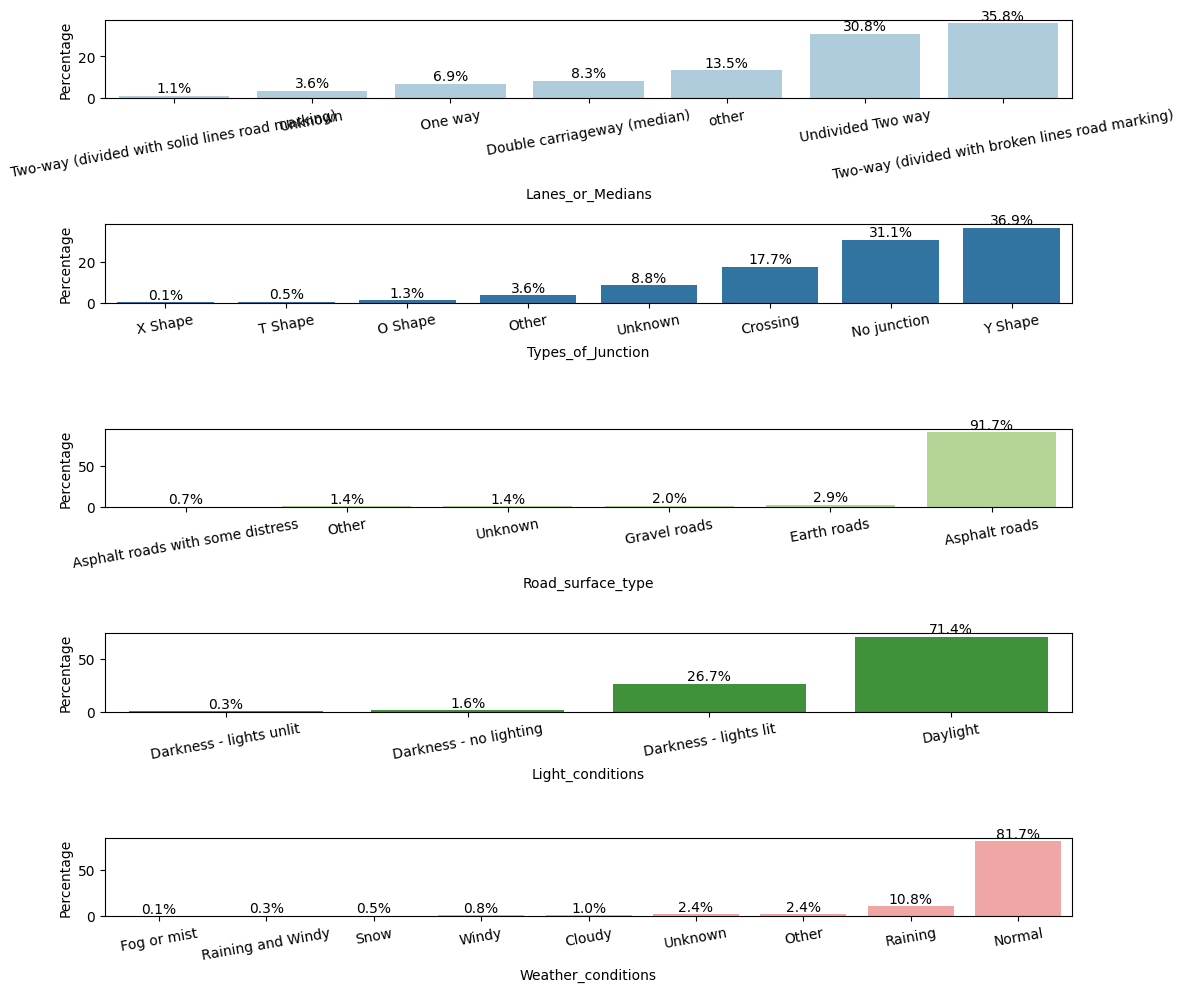

In [12]:
categories = ['Lanes_or_Medians','Types_of_Junction', 'Road_surface_type', 'Light_conditions','Weather_conditions']
fig, axes = plt.subplots(5, 1, figsize=(12, 10))
palette = sns.color_palette("Paired", len(categories))

for category, ax, color in zip(categories, axes.flatten(), palette):
    category_percentage = np.round(df[category].value_counts(normalize=True, ascending=True) * 100, 2)
    category_percentage_df = category_percentage.reset_index()
    category_percentage_df.columns = [category, 'Percentage']
    
    sns.barplot(data=category_percentage_df, x=category, y='Percentage', ax=ax, color=color)
    ax.bar_label(ax.containers[0], fmt='%.1f%%')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=10) 

plt.tight_layout()
plt.show()

#### 3. Accident Attributes
* ['Type_of_collision','Vehicle_movement','Accident_severity']

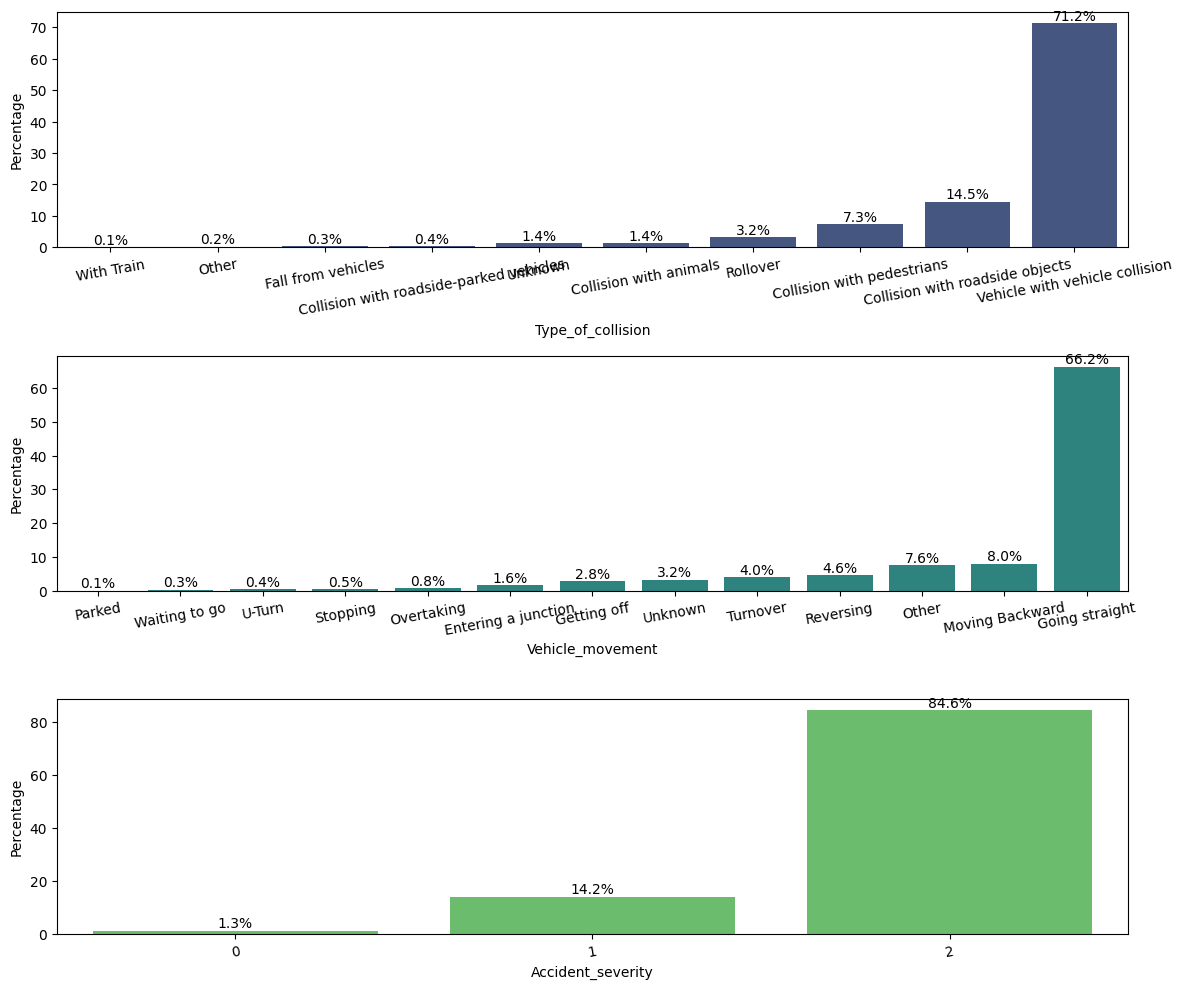

In [13]:
categories = ['Type_of_collision','Vehicle_movement','Accident_severity']
fig, axes = plt.subplots(3, 1, figsize=(12, 10))
palette = sns.color_palette("viridis", len(categories))

for category, ax, color in zip(categories, axes.flatten(), palette):
    category_percentage = np.round(df[category].value_counts(normalize=True, ascending=True) * 100, 2)
    category_percentage_df = category_percentage.reset_index()
    category_percentage_df.columns = [category, 'Percentage']
    
    sns.barplot(data=category_percentage_df, x=category, y='Percentage', ax=ax, color=color)
    ax.bar_label(ax.containers[0], fmt='%.1f%%')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=10) 
plt.tight_layout()
plt.show()

In [14]:
df[:2]

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2


#### Que 1: Which gender causes dangerous accidens while driving?

* Male/Female accident rate percentage

In [15]:
((df.groupby('Sex_of_driver').size()/df['Sex_of_driver'].count())*100).add_prefix('Accident Caused by ').add_suffix(' in %')

Sex_of_driver
Accident Caused by Female in %      5.691783
Accident Caused by Male in %       92.862943
Accident Caused by Unknown in %     1.445274
dtype: float64

* Here the percentage of accidents done by Male is over 92% but it doesn't actually indicates that males are more dangerous
* Creating a cross-tabulation of Sex_of_driver and Accident_severity

In [16]:
df_gender=pd.crosstab(index=df['Sex_of_driver'].loc[df['Sex_of_driver'] !="Unknown"],columns=df['Accident_severity'],margins=True)
df_gender

Accident_severity,0,1,2,All
Sex_of_driver,,,,
Female,5,104,592,701
Male,152,1621,9664,11437
All,157,1725,10256,12138


* Calculating the conditional probability (i.e. probability of accident severity given gender)

In [17]:
Accident_severity=[0,1,2]
gender_list=['Male','Female']
for gender in gender_list:
    for severity in Accident_severity:
        prob=(df_gender.loc[gender][severity]/(df_gender.loc[gender][0:3].sum()))
        print(f'P[{gender}/{severity})] is: {prob:.4f}')
    print()

P[Male/0)] is: 0.0133
P[Male/1)] is: 0.1417
P[Male/2)] is: 0.8450

P[Female/0)] is: 0.0071
P[Female/1)] is: 0.1484
P[Female/2)] is: 0.8445



* It can be said that for each gender the probability of making severe accident are same.

Text(0, 0.5, 'Proportion')

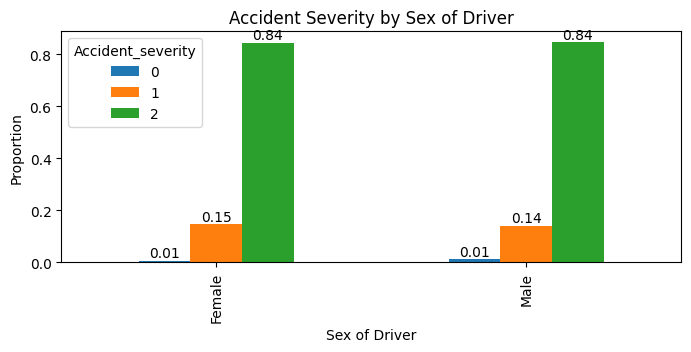

In [18]:
curve=pd.crosstab(index=df['Sex_of_driver'].loc[df['Sex_of_driver'] !="Unknown"],columns=df['Accident_severity'],normalize='index')
ax = curve.plot(kind='bar', figsize=(8, 3))
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
plt.title('Accident Severity by Sex of Driver')
plt.xlabel('Sex of Driver')
plt.ylabel('Proportion')

### Que 2: Exploring the Top-5 reasons for the accidents

* Filter out the records where cause of accident is not known

In [19]:
df_a=df.loc[df['Cause_of_accident']!='Unknown']
df_a[:2]

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2


* Exploring the Top-5 Reasons of Cause of Accidents

In [20]:
df_a.value_counts(subset='Cause_of_accident', normalize=True).sort_values(ascending=False).round(3).head()

Cause_of_accident
No distancing                 0.184
Changing lane to the right    0.147
Changing lane to the left     0.120
Driving carelessly            0.114
No priority to vehicle        0.098
Name: proportion, dtype: float64

* Exploring Top-5 reason of accident where Gender is Male

In [21]:
df_a.loc[df_a['Sex_of_driver']=='Male'].value_counts(subset='Cause_of_accident',normalize=True).sort_values(ascending=False).round(3).head()

Cause_of_accident
No distancing                 0.184
Changing lane to the right    0.147
Changing lane to the left     0.120
Driving carelessly            0.114
No priority to vehicle        0.098
Name: proportion, dtype: float64

* Exploring Top-5 reason of accident where Gender is Female

In [22]:
df_a.loc[df_a['Sex_of_driver']=='Female'].value_counts(subset='Cause_of_accident',normalize=True).sort_values(ascending=False).round(3).head()

Cause_of_accident
No distancing                 0.203
Changing lane to the right    0.143
Changing lane to the left     0.120
No priority to vehicle        0.111
Driving carelessly            0.106
Name: proportion, dtype: float64

### Ques 3: Analysis of light conditions

In [23]:
df['Light_conditions'].value_counts(normalize=True).round(3)

Light_conditions
Daylight                   0.714
Darkness - lights lit      0.267
Darkness - no lighting     0.016
Darkness - lights unlit    0.003
Name: proportion, dtype: float64

In [24]:
df_light=df[df['Light_conditions']=='Daylight']['Accident_severity']
df_dark=df[df['Light_conditions'].str.startswith('Dark')]['Accident_severity']

* Perform Independent T-Test
    * Null Hypothesis (Ho): Accident severity is similar in both daylight and darkness. '$\mu_{daylight} = \mu_{dark}$
    * Alternate Hypotheiss (Ha): Accident severity in darkness is greater than daylight. '$\mu_{daylight} > \mu_{dark}$

In [25]:
ttest_ind(df_light,df_dark,alternative='greater')

TtestResult(statistic=3.679069795099939, pvalue=0.00011754201809361974, df=12314.0)

* Since p_value<0.05. Hence null hypothesis is rejected.
* Conclusion: Accident severity rate is higher in daylight compared to dark conditions.

### Ques 4: Analysis of Road_surface_type

In [26]:
df['Road_surface_type'].value_counts(normalize=True).round(3)

Road_surface_type
Asphalt roads                       0.917
Earth roads                         0.029
Gravel roads                        0.020
Unknown                             0.014
Other                               0.014
Asphalt roads with some distress    0.007
Name: proportion, dtype: float64

* Null Hypothesis (Ho): Accident severity is similar on both Asphalt roads and Earth-Gravel Roads.
i.e. '$\mu_{asphalt} = \mu_{earth-gravel}$
* Null Hypothesis (Ha): Accident severity on Asphalt roads are higher than Earth-Gravel Roads.
i.e. '$\mu_{asphalt} > \mu_{earth-gravel}$

In [27]:
df_asphalt=df[df['Road_surface_type'].str.startswith('Asphalt')]['Accident_severity']
df_earth_gravel=df[(df['Road_surface_type']=='Earth roads') | (df['Road_surface_type']=='Gravel roads')]['Accident_severity']

In [28]:
ttest_ind(df_asphalt,df_earth_gravel,alternative='greater')

TtestResult(statistic=0.7729796511599925, pvalue=0.21977484012099108, df=11975.0)

* Since p_value>0.05 i.e. failed to reject the null hypothesis.
* Accident severity is similar on both either Asphalt roads or Eath-gravel roads

### Ques 5: Analysis of Weather conditions

In [29]:
df['Weather_conditions'].value_counts(normalize=True).round(3)

Weather_conditions
Normal               0.817
Raining              0.108
Other                0.024
Unknown              0.024
Cloudy               0.010
Windy                0.008
Snow                 0.005
Raining and Windy    0.003
Fog or mist          0.001
Name: proportion, dtype: float64

* Null Hypothesis (Ho): Accident severity is similar on Rainy and Normal Days.
i.e. '$\mu_{normal} = \mu_{rainy}$
* Null Hypothesis (Ha): Accident severity on Rainy days are higher than Normal days.
i.e. '$\mu_{rainy} > \mu_{normal}$

In [30]:
df_normal=df[df['Weather_conditions']=='Normal']['Accident_severity']
df_rainy=df[df['Weather_conditions']=='Raining']['Accident_severity']

In [31]:
ttest_ind(df_rainy,df_normal,alternative='greater')

TtestResult(statistic=1.6690830919769557, pvalue=0.04756419567749851, df=11392.0)

* Since p_value<0.05. Hence Null hypothesis is rejected and alternate hypotheis is accepted.
* **Conclusion:** Accident severity on rainy days are higher than normal days.

### Que 6: Exploring Age-Group

* Filter out the rows where Age of driver is unknown.

In [32]:
df_age=df.loc[df['Age_band_of_driver'] !="Unknown", ['Age_band_of_driver', 'Accident_severity']]

* Calcuate the percentage chance of accident in the different age-groups

In [33]:
((df_age.groupby('Age_band_of_driver').size()/df['Age_band_of_driver'].count())*100).round(2).add_prefix('% chance of accident in Age-group ')

Age_band_of_driver
% chance of accident in Age-group 18-30       34.68
% chance of accident in Age-group 31-50       33.18
% chance of accident in Age-group Over 51     12.87
% chance of accident in Age-group Under 18     6.70
dtype: float64

* Mean Accident severity for each Age-group

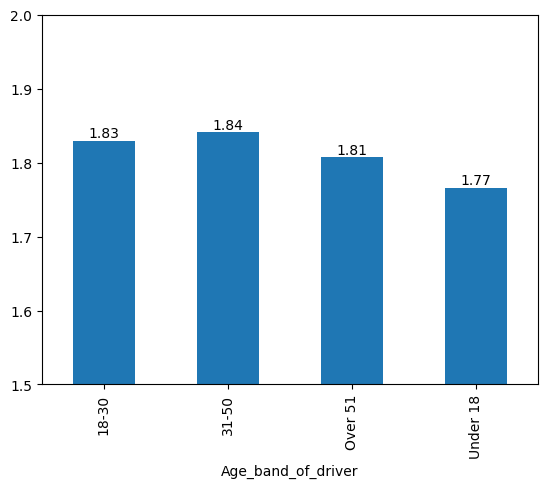

In [34]:
df_age_bar=df_age.groupby('Age_band_of_driver')['Accident_severity'].mean().plot(kind='bar')
df_age_bar.set_ylim([1.5,2.00])
df_age_bar.bar_label(df_age_bar.containers[0], fmt='%.2f')
plt.show()

* Checking if there is any association between Age-group and Accident_severity

* Perform Chi-Square Test
    * Null Hypothesis (Ho): **Age-group** & **Accident-severity** are not associated
    * Null Hypothesis (Ha): **Age-group** & **Accident-severity** are associated

In [35]:
obs=pd.crosstab(index=df_age['Age_band_of_driver'], columns=df_age['Accident_severity'])
obs

Accident_severity,0,1,2
Age_band_of_driver,,,
18-30,62,604,3605
31-50,54,541,3492
Over 51,24,257,1304
Under 18,12,169,644


In [36]:
chi2_contingency(obs)

Chi2ContingencyResult(statistic=33.769702227201805, pvalue=7.452442073248769e-06, dof=6, expected_freq=array([[  60.28900446,  623.11859212, 3587.59240342],
       [  57.69167905,  596.27386701, 3433.03445394],
       [  22.37369985,  231.2439636 , 1331.38233655],
       [  11.64561664,  120.36357727,  692.99080609]]))

* Since p_value<<0.05. Hence null hypothesis is rejected. Accept Alternate hypothesis
* **Conclusion:** Age-group & Accident-severity are associated

In [37]:
def func(x):
    if x=='Under 18':
        return 'Youth'
    elif x=='18-30':
        return 'Young Adult'
    elif x=='31-50':
        return 'Middle-aged'
    elif x=='Over 51':
        return 'Senior'

In [38]:
df_age['Age_category']=df_age['Age_band_of_driver'].apply(func)
df_age[:2]

,Age_band_of_driver,Accident_severity,Age_category
0,18-30,2,Young Adult
1,31-50,2,Middle-aged


In [39]:
pd.crosstab(index=df_age['Age_category'], columns=df_age['Accident_severity'],normalize='columns').round(3)

Accident_severity,0,1,2
Age_category,,,
Middle-aged,0.355,0.344,0.386
Senior,0.158,0.164,0.144
Young Adult,0.408,0.384,0.399
Youth,0.079,0.108,0.071


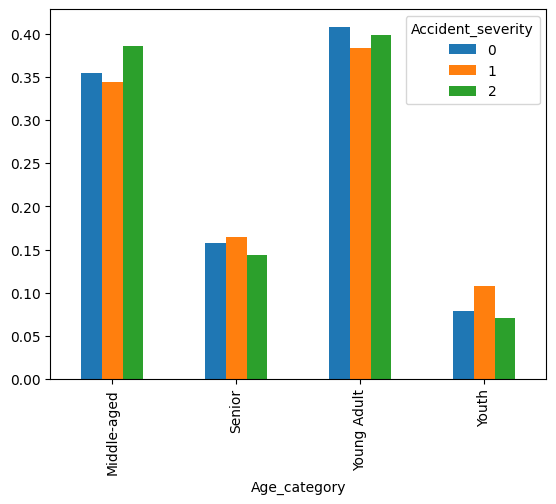

<Figure size 1200x500 with 0 Axes>

In [40]:
pd.crosstab(index=df_age['Age_category'], columns=df_age['Accident_severity'],normalize='columns').round(3).plot(kind='bar')
plt.figure(figsize=(12,5))
plt.show()

**Conclusion**
. Middle-aged and Young Adult has higher probability of making fatal accidents (accident severity of level 2) 

### Que 7 Exploring Educational-Level

* Filter out the rows where Age of driver is unknown.

In [46]:
df_edu=df.loc[df['Educational_level'] !="Unknown", ['Educational_level', 'Accident_severity']]

* Calcuate the percentage chance of accident in the different age-groups

In [48]:
((df_edu.groupby('Educational_level').size()/df['Educational_level'].count())*100).round(2).add_prefix('% chance of accident in Educational-category ')

Educational_level
% chance of accident in Educational-category Above high school      2.94
% chance of accident in Educational-category Elementary school     17.56
% chance of accident in Educational-category High school            9.01
% chance of accident in Educational-category Illiterate             0.37
% chance of accident in Educational-category Junior high school    61.86
% chance of accident in Educational-category Writing & reading      1.43
dtype: float64

* Mean Accident severity for each Educational level group

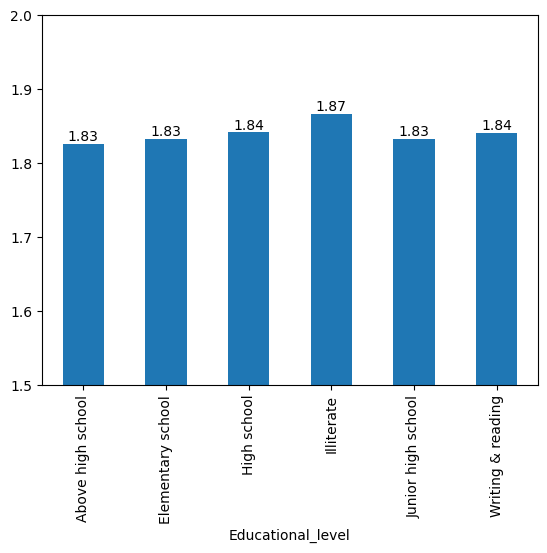

In [49]:
df_edu_bar=df_edu.groupby('Educational_level')['Accident_severity'].mean().plot(kind='bar')
df_edu_bar.set_ylim([1.5,2.00])
df_edu_bar.bar_label(df_edu_bar.containers[0], fmt='%.2f')
plt.show()

* Checking if there is any association between Educational Level and Accident_severity

* Perform Chi-Square Test
    * Null Hypothesis (Ho): **Educational level** & **Accident-severity** are not associated
    * Null Hypothesis (Ha): **Educational level** & **Accident-severity** are associated

In [50]:
obs_edu=pd.crosstab(index=df_edu['Educational_level'], columns=df_edu['Accident_severity'])
obs_edu

Accident_severity,0,1,2
Educational_level,,,
Above high school,5,53,304
Elementary school,24,314,1825
High school,15,146,949
Illiterate,0,6,39
Junior high school,97,1083,6439
Writing & reading,3,22,151


In [51]:
chi2_contingency(obs_edu)

Chi2ContingencyResult(statistic=2.9838139325211666, pvalue=0.9818024099338314, dof=10, expected_freq=array([[4.54274510e+00, 5.12320697e+01, 3.06225185e+02],
       [2.71435294e+01, 3.06118693e+02, 1.82973778e+03],
       [1.39294118e+01, 1.57092810e+02, 9.38977778e+02],
       [5.64705882e-01, 6.36862745e+00, 3.80666667e+01],
       [9.56109804e+01, 1.07827939e+03, 6.44510963e+03],
       [2.20862745e+00, 2.49084096e+01, 1.48882963e+02]]))

* Since p_value<<0.05. Hence null hypothesis is rejected. Accept Alternate hypothesis
* **Conclusion:** Educational_Level & Accident-severity are associated

In [52]:
df

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,1
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,31-50,Male,Unknown,Employee,2-5yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,No distancing,2
12312,Unknown,Male,Elementary school,Employee,5-10yr,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,No distancing,2
12313,Over 51,Male,Junior high school,Employee,5-10yr,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,Changing lane to the right,1
12314,18-30,Female,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,Driving under the influence of drugs,2


### Que 7 Exploring Driving_experience

In [55]:
'Driving_experience'

* Filter out the rows where Driving_experience is unknown.

In [ ]:
df_driv=df.loc[df['Driving_experience'] !="Unknown", ['Driving_experience', 'Accident_severity']]

* Calcuate the percentage chance of accident in the different driving expereince.

In [56]:
((df_driv.groupby('Driving_experience').size()/df['Driving_experience'].count())*100).round(2).add_prefix('% chance of accident in Educational-category ')

Driving_experience
% chance of accident in Educational-category 1-2yr         14.26
% chance of accident in Educational-category 2-5yr         21.22
% chance of accident in Educational-category 5-10yr        27.31
% chance of accident in Educational-category Above 10yr    18.37
% chance of accident in Educational-category Below 1yr     10.90
% chance of accident in Educational-category No Licence     0.96
% chance of accident in Educational-category unknown        0.27
dtype: float64

In [ ]:
* Mean Accident severity for each driving experience group

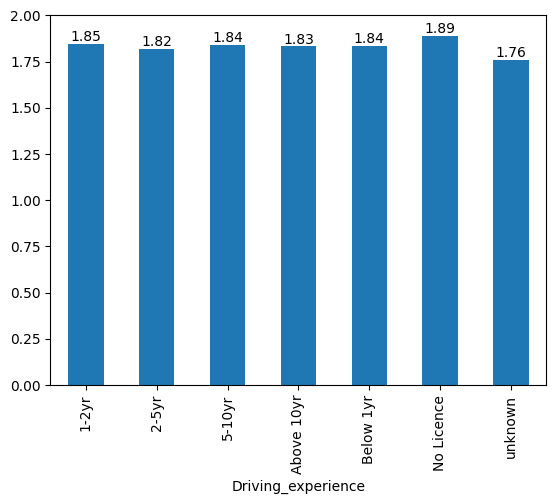

In [58]:
df_driv_bar=df_driv.groupby('Driving_experience')['Accident_severity'].mean().plot(kind='bar')
df_driv_bar.set_ylim([0,2.00])
df_driv_bar.bar_label(df_driv_bar.containers[0], fmt='%.2f')
plt.show()

In [ ]:
* Checking if there is any association between driving experience and Accident_severity

In [ ]:
* Perform Chi-Square Test
    * Null Hypothesis (Ho): **Driving expereicen** & **Accident-severity** are not associated
    * Null Hypothesis (Ha): **Driving expereince** & **Accident-severity** are associated

In [59]:
obs_driv=pd.crosstab(index=df_driv['Driving_experience'], columns=df_driv['Accident_severity'])
obs_driv

Accident_severity,0,1,2
Driving_experience,,,
1-2yr,21,228,1507
2-5yr,46,381,2186
5-10yr,41,462,2860
Above 10yr,29,323,1910
Below 1yr,7,207,1128
No Licence,0,13,105
unknown,1,6,26


In [60]:
chi2_contingency(obs_driv)

Chi2ContingencyResult(statistic=19.705156971109627, pvalue=0.07287302980779678, dof=12, expected_freq=array([[2.21659267e+01, 2.47646905e+02, 1.48618717e+03],
       [3.29838078e+01, 3.68508749e+02, 2.21150744e+03],
       [4.24510316e+01, 4.74280491e+02, 2.84626848e+03],
       [2.85531470e+01, 3.19007574e+02, 1.91443928e+03],
       [1.69400192e+01, 1.89260904e+02, 1.13579908e+03],
       [1.48950988e+00, 1.66414207e+01, 9.98690694e+01],
       [4.16557848e-01, 4.65395665e+00, 2.79294855e+01]]))